In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
response_API = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = response_API.text
parse_json = json.loads(data)
parse_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
events = pd.DataFrame.from_dict(parse_json['events'])
events.head(19)

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,ranked_count,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,0,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0
5,6,Gameweek 6,2023-09-23T12:30:00Z,68,True,True,4494759.0,1695472200,0,142.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 78528},...",355.0,343.0,430.0,"{'id': 430, 'points': 18}",12109066,355.0,308.0
6,7,Gameweek 7,2023-09-30T10:00:00Z,49,True,True,9335002.0,1696068000,0,156.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 79672},...",355.0,430.0,60.0,"{'id': 60, 'points': 23}",15579302,355.0,308.0
7,8,Gameweek 8,2023-10-07T10:00:00Z,44,True,True,10068163.0,1696672800,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 53401},...",355.0,516.0,216.0,"{'id': 216, 'points': 16}",19444885,355.0,355.0
8,9,Gameweek 9,2023-10-21T10:00:00Z,67,True,True,6931177.0,1697882400,0,152.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 50175},...",355.0,60.0,423.0,"{'id': 423, 'points': 17}",11431916,355.0,308.0
9,10,Gameweek 10,2023-10-27T17:30:00Z,66,True,True,9895223.0,1698427800,0,134.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 80903},...",355.0,60.0,13.0,"{'id': 13, 'points': 17}",12428517,355.0,355.0


In [5]:
parse_json['game_settings']

{'league_join_private_max': 30,
 'league_join_public_max': 5,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_max_size_private_h2h': 16,
 'league_max_ko_rounds_private_h2h': 3,
 'league_prefix_public': 'League',
 'league_points_h2h_win': 3,
 'league_points_h2h_lose': 0,
 'league_points_h2h_draw': 1,
 'league_ko_first_instead_of_random': False,
 'cup_start_event_id': None,
 'cup_stop_event_id': None,
 'cup_qualifying_method': None,
 'cup_type': None,
 'featured_entries': [],
 'percentile_ranks': [1,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  95,
  90,
  95],
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'ui_currency_multiplier': 10,
 'ui_use_special_shirts': False,
 'ui_special_shirt_exclusions': [],
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'transfers_cap': 20,
 'transfers_sell_on_fee': 0.5,
 'league_h2h_tiebreak_stats': ['+go

In [6]:
parse_json['phases']

[{'id': 1, 'name': 'Overall', 'start_event': 1, 'stop_event': 38},
 {'id': 2, 'name': 'August', 'start_event': 1, 'stop_event': 3},
 {'id': 3, 'name': 'September', 'start_event': 4, 'stop_event': 7},
 {'id': 4, 'name': 'October', 'start_event': 8, 'stop_event': 10},
 {'id': 5, 'name': 'November', 'start_event': 11, 'stop_event': 13},
 {'id': 6, 'name': 'December', 'start_event': 14, 'stop_event': 20},
 {'id': 7, 'name': 'January', 'start_event': 21, 'stop_event': 22},
 {'id': 8, 'name': 'February', 'start_event': 23, 'stop_event': 26},
 {'id': 9, 'name': 'March', 'start_event': 27, 'stop_event': 30},
 {'id': 10, 'name': 'April', 'start_event': 31, 'stop_event': 35},
 {'id': 11, 'name': 'May', 'start_event': 36, 'stop_event': 38}]

In [7]:
teams = pd.DataFrame.from_dict(parse_json['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1130,1185,1100,1120,1160,1250,131


In [8]:
parse_json['total_players']

10610800

In [9]:
elements = pd.DataFrame.from_dict(parse_json['elements'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,62508,180,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,641,63,632,64,610,63,645,65,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,531,94,503,41,654,68,327,52,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,0.5,0.5,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,35369,206,43065,1079,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,505,180,486,178,450,161,509,179,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,744,233,309,101,517,177,254,98,0.00,0.00
2,25.0,0.0,153256,0,0,-1,1,0,3,0.1,0.0,0,Mohamed,0.0,3,False,International Duty - 25% chance of playing,2023-12-30T22:30:09.113694Z,44,153256.jpg,4.0,Elneny,0.1,False,None,d,1,3,4,12820,17,19143,287,0.0,0.9,M.Elneny,1,0,1,0,0,0,0,0,0,0,0,0,12,1.8,0.5,2.0,0.4,0,0.00,0.00,0.00,0.00,489,223,459,224,433,215,487,222,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,502,292,487,164,56,32,468,158,0.00,0.00
3,50.0,50.0,438098,0,0,-1,1,0,3,0.2,0.2,0,Fábio,0.0,4,False,Lack of match fitness - 50% chance of playing,2023-12-07T12:00:08.489004Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,d,1,3,21,11481,7,18635,100,0.0,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,340,147,282,154,218,122,325,147,5.0,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,127,79,745,319,219,97,442,144,0.76,0.38
4,75.0,100.0,226597,0,0,0,0,2,2,13.1,17.5,17,Gabriel,17.0,5,False,Knock - 75% chance of playing,2024-01-20T15:30:09.437664Z,50,226597.jpg,3.9,dos Santos Magalhães,18.2,False,None,d,1,3,75,1609060,74461,2666934,53026,3.4,15.0,Gabriel,1544,2,1,6,17,0,0,0,1,0,0,6,339,368.0,75.9,158.0,60.3,17,2.11,0.35,2.46,15.07,69,23,253,74,136,16,141,32,NaN,,NaN,,NaN,,0.12,0.0,0.02,0.14,0.88,0.99,198,23,9,1,66,13,19,7,0.99,0.35


In [10]:
elements = elements.set_index('id')

In [11]:
parse_json['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'},
 {'label': 'Game(s) Started', 'name': 'starts'},
 {'label': 'Expected Goals', 'name': 'expected_goals'},
 {'label': 'Expected Assists', 'name': 'expected_assists'},
 {'label': 'Expe

In [12]:
parse_json['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 91},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 255},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 343},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

# New API Discovered
https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings=1&phase=1

this api return the managers rank and data to help us to study pro managers behavior.

In [13]:
standings = pd.DataFrame()

In [14]:
for i in range(1,21):
    response_API = requests.get('https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)+'&phase=1')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if standings.empty:
        standings = pd.DataFrame.from_dict(parse_json['standings']['results'])
    else:
        standings = pd.concat([standings,pd.DataFrame.from_dict(parse_json['standings']['results'])])

In [15]:
standings.shape

(1000, 9)

In [16]:
standings.head()

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,19043135,63,tis vaishakh,1,1,1,1419,2800696,immaterial boys <3
1,388652,89,Harrison Frost,2,24,2,1407,66280,Frosty’s squad
2,2214268,105,Chris Knowles,3,83,3,1407,364940,Klinsmann Dive Club
3,136498,69,Cedric L,4,5,4,1406,24088,mbeumo phật
4,1266703,70,h3_1e .🇮🇶,5,7,5,1406,212473,hsen ali


In [17]:
standings.describe()

,id,event_total,rank,last_rank,rank_sort,total,entry
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.768302e+07,72.904000,498.020000,1446.002000,500.500000,1351.690000,2.381312e+06
std,1.793868e+07,13.896543,287.691888,2228.230736,288.819436,11.502269,2.183382e+06
min,5.380000e+02,38.000000,1.000000,1.000000,1.000000,1339.000000,1.080000e+02
25%,3.418928e+06,63.000000,248.000000,253.000000,250.750000,1343.000000,5.529850e+05
50%,1.129553e+07,71.000000,497.000000,680.000000,500.500000,1348.000000,1.730330e+06
75%,2.687663e+07,82.000000,747.000000,1593.000000,750.250000,1357.000000,3.780069e+06
max,6.838254e+07,111.000000,998.000000,22842.000000,1000.000000,1419.000000,8.049488e+06


<AxesSubplot:>

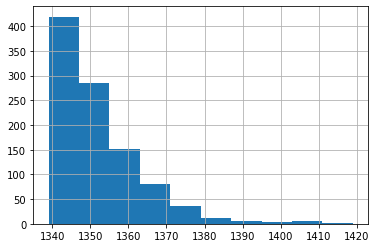

In [18]:
standings['total'].hist()

<AxesSubplot:>

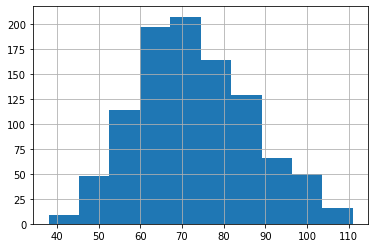

In [19]:
standings['event_total'].hist()

# This API give you detailed pickup for specific manager in specific gameweek
https://fantasy.premierleague.com/api/entry/[team-id]/event/[GW]/picks/

In [50]:
def get_pickups_for_top_managers(gw_number, top_managers_ids):
    picks_for_top_1000_manager_list = []
    i=1
    for entry in top_managers_ids:
        response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
        #print(response_API.status_code)
        data = response_API.text
        parse_json = json.loads(data)
        '''if picks_for_top_1000_manager.empty:
            picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
        else:
            picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
        '''

        picks_for_top_1000_manager_list+=parse_json['picks']
        print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
        i+=1
    picks_for_top_1000_manager = pd.DataFrame(picks_for_top_1000_manager_list)
    return picks_for_top_1000_manager

In [52]:
gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
picks_for_top_1000_manager = get_pickups_for_top_managers(gw_number,standings['entry'])
picks_for_top_1000_manager.shape

(15000, 5)

In [53]:
picks_for_top_1000_manager.head()

,element,position,multiplier,is_captain,is_vice_captain
0,409,1,1,False,False
1,506,2,1,False,False
2,5,3,1,False,False
3,131,4,1,False,False
4,19,5,2,True,False


In [49]:
'''gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
i=1
for entry in standings['entry']:
    response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    '''
    '''if picks_for_top_1000_manager.empty:
        picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
    else:
        picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
    '''
    '''
    
    picks_for_top_1000_manager_list+=parse_json['picks']
    print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
    i+=1
#print('Number of picks:',len(picks_for_top_1000_manager_list))
#picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
#picks_for_top_1000_manager.shape'''

In [54]:
picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

In [55]:
print('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager= pd.read_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

GW21_picks_for_top_1000_manager.csv


In [56]:
picks_for_top_1000_manager['element'] = picks_for_top_1000_manager['element'].astype("category")
picks_for_top_1000_manager.describe(include='all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,15000.000000,15000.0,15000.000000,15000.000000,15000,15000
unique,NaN,212.0,NaN,NaN,2,2
top,NaN,362.0,NaN,NaN,False,False
freq,NaN,962.0,NaN,NaN,14000,14000
mean,7499.500000,NaN,8.000000,0.800000,NaN,NaN
std,4330.271354,NaN,4.320638,0.541621,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3749.750000,NaN,4.000000,0.000000,NaN,NaN
50%,7499.500000,NaN,8.000000,1.000000,NaN,NaN
75%,11249.250000,NaN,12.000000,1.000000,NaN,NaN


In [57]:
picks_for_top_100_manager = picks_for_top_1000_manager.head(1500)
picks_for_top_100_manager.describe(include = 'all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,1500.000000,1500.0,1500.000000,1500.000000,1500,1500
unique,NaN,118.0,NaN,NaN,2,2
top,NaN,362.0,NaN,NaN,False,False
freq,NaN,98.0,NaN,NaN,1400,1400
mean,749.500000,NaN,8.000000,0.800000,NaN,NaN
std,433.157015,NaN,4.321935,0.541783,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,374.750000,NaN,4.000000,0.000000,NaN,NaN
50%,749.500000,NaN,8.000000,1.000000,NaN,NaN
75%,1124.250000,NaN,12.000000,1.000000,NaN,NaN


In [58]:
players_pick_count_for_top_1000_manager = picks_for_top_1000_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_1000_manager.describe()

,count
count,212.000000
mean,70.754717
std,163.157547
min,1.000000
25%,2.000000
50%,10.500000
75%,38.000000
max,962.000000


In [59]:
players_pick_count_for_top_100_manager = picks_for_top_100_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager[players_pick_count_for_top_100_manager['count']>0]
players_pick_count_for_top_100_manager.shape

(118, 2)

In [60]:
players_pick_count_for_top_1000_manager['percentage_over_1000'] = (players_pick_count_for_top_1000_manager['count']/1000)*100

In [61]:
players_pick_count_for_top_1000_manager.describe()

,count,percentage_over_1000
count,212.000000,212.000000
mean,70.754717,7.075472
std,163.157547,16.315755
min,1.000000,0.100000
25%,2.000000,0.200000
50%,10.500000,1.050000
75%,38.000000,3.800000
max,962.000000,96.200000


In [62]:
players_pick_count_for_top_100_manager['percentage_over_100'] = (players_pick_count_for_top_100_manager['count']/100)*100

In [63]:
players_pick_count_for_top_100_manager.describe()

,count,percentage_over_100
count,118.000000,118.000000
mean,12.711864,12.711864
std,20.226538,20.226538
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,13.750000,13.750000
max,98.000000,98.000000


In [64]:
players_pick_count_for_top_1000_manager.head(20)

,player_id,count,percentage_over_1000
0,362,962,96.2
1,60,920,92.0
2,19,786,78.6
3,524,780,78.0
4,506,750,75.0
5,85,638,63.8
6,5,584,58.4
7,353,582,58.2
8,131,521,52.1
9,409,477,47.7


In [65]:
players_pick_count_for_top_1000_manager = players_pick_count_for_top_1000_manager.set_index('player_id')

In [66]:
players_pick_count_for_top_1000_manager.index

CategoricalIndex([362,  60,  19, 524, 506,  85,   5, 353, 131, 409,
                  ...
                  168, 569, 572, 573, 577, 354, 588, 152, 591, 318],
                 categories=[5, 8, 12, 13, 14, 19, 20, 23, ...], ordered=False, dtype='category', name='player_id', length=212)

In [67]:
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager.set_index('player_id')

In [68]:
players_pick_count_for_top_100_manager.index

CategoricalIndex([362,  60,  19, 506, 524, 353,  85,   5, 131, 343,
                  ...
                  191, 687, 116,  41,  34, 265, 139, 689, 602, 302],
                 categories=[5, 8, 12, 13, 14, 19, 20, 23, ...], ordered=False, dtype='category', name='player_id', length=118)

In [69]:
top=[]
for player_id in players_pick_count_for_top_1000_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_1000_owned_percentage':players_pick_count_for_top_1000_manager.loc[player_id]['percentage_over_1000'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_1000_owned_percentage': 96.2,
  'overall_owned_percentage': '37.8'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_1000_owned_percentage': 92.0,
  'overall_owned_percentage': '54.7'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_1000_owned_percentage': 78.60000000000001,
  'overall_owned_percentage': '61.5'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_1000_owned_percentage': 78.0,
  'overall_owned_percentage': '36.7'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_1000_owned_percentage': 75.0,
  'overall_owned_percentage': '34.1'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_1000_owned_percentage': 63.800000000000004,
  'overall_owned_percentage': '26.9'},
 {'id': 5,
  'name': 'Gabriel',
  'element_type': 2,
  'top_1000_owned_percentage': 58.4,
  'overall_owned_percentage': '18.2'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_10

In [70]:
top_owned_players_for_top_1000_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_1000_manager.head(15)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,362,Palmer,3,96.2,37.8
1,60,Watkins,4,92.0,54.7
2,19,Saka,3,78.6,61.5
3,524,Areola,1,78.0,36.7
4,506,Pedro Porro,2,75.0,34.1
5,85,Solanke,4,63.8,26.9
6,5,Gabriel,2,58.4,18.2
7,353,Foden,3,58.2,28.4
8,131,Estupiñan,2,52.1,28.4
9,409,Dubravka,1,47.7,8.4


In [71]:
top=[]
for player_id in players_pick_count_for_top_100_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_100_owned_percentage':players_pick_count_for_top_100_manager.loc[player_id]['percentage_over_100'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_100_owned_percentage': 98.0,
  'overall_owned_percentage': '37.8'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_100_owned_percentage': 90.0,
  'overall_owned_percentage': '54.7'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_100_owned_percentage': 77.0,
  'overall_owned_percentage': '61.5'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_100_owned_percentage': 75.0,
  'overall_owned_percentage': '34.1'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_100_owned_percentage': 75.0,
  'overall_owned_percentage': '36.7'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_100_owned_percentage': 61.0,
  'overall_owned_percentage': '28.4'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_100_owned_percentage': 61.0,
  'overall_owned_percentage': '26.9'},
 {'id': 5,
  'name': 'Gabriel',
  'element_type': 2,
  'top_100_owned_percentage': 60.0,
  'over

In [72]:
top_owned_players_for_top_100_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_100_manager.head(15)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,362,Palmer,3,98.0,37.8
1,60,Watkins,4,90.0,54.7
2,19,Saka,3,77.0,61.5
3,506,Pedro Porro,2,75.0,34.1
4,524,Areola,1,75.0,36.7
5,353,Foden,3,61.0,28.4
6,85,Solanke,4,61.0,26.9
7,5,Gabriel,2,60.0,18.2
8,131,Estupiñan,2,59.0,28.4
9,343,J.Alvarez,4,48.0,35.2


In [73]:
top_owned_GK_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==1]
top_owned_GK_for_top_1000_manager.shape

(31, 5)

In [74]:
top_owned_GK_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==1]
top_owned_GK_for_top_100_manager.shape

(19, 5)

In [75]:
top_owned_GK_for_top_1000_manager

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
3,524,Areola,1,78.0,36.7
9,409,Dubravka,1,47.7,8.4
26,28,Turner,1,14.3,12.1
32,275,Leno,1,10.7,16.0
35,113,Raya,1,9.7,6.4
46,77,Neto,1,5.3,3.4
47,263,Pickford,1,5.2,9.6
49,49,Martinez,1,5.1,12.3
56,352,Ederson M.,1,3.6,15.3
59,291,A.Becker,1,3.5,14.5


In [76]:
top_owned_GK_for_top_100_manager

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
4,524,Areola,1,75.0,36.7
12,409,Dubravka,1,39.0,8.4
23,275,Leno,1,16.0,16.0
26,28,Turner,1,15.0,12.1
35,113,Raya,1,10.0,6.4
40,49,Martinez,1,9.0,12.3
41,263,Pickford,1,8.0,9.6
45,77,Neto,1,7.0,3.4
62,291,A.Becker,1,3.0,14.5
69,148,Steele,1,3.0,2.2


In [77]:
top_owned_DF_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==2]
top_owned_DF_for_top_1000_manager.shape

(84, 5)

In [78]:
top_owned_DF_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==2]
top_owned_DF_for_top_100_manager.shape

(50, 5)

In [79]:
top_owned_DF_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
4,506,Pedro Porro,2,75.0,34.1
6,5,Gabriel,2,58.4,18.2
8,131,Estupiñan,2,52.1,28.4
10,290,Alexander-Arnold,2,44.3,20.7
16,20,Saliba,2,26.3,37.5
18,203,Gusto,2,23.9,7.2
20,178,Taylor,2,18.8,4.7
22,369,Walker,2,17.0,18.5
24,430,Trippier,2,15.5,37.0
27,197,Colwill,2,13.0,6.9


In [80]:
top_owned_DF_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
3,506,Pedro Porro,2,75.0,34.1
7,5,Gabriel,2,60.0,18.2
8,131,Estupiñan,2,59.0,28.4
11,290,Alexander-Arnold,2,43.0,20.7
13,203,Gusto,2,34.0,7.2
17,369,Walker,2,21.0,18.5
19,20,Saliba,2,21.0,37.5
25,321,Doughty,2,16.0,4.4
27,430,Trippier,2,14.0,37.0
30,197,Colwill,2,13.0,6.9


In [81]:
top_owned_MID_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==3]
top_owned_MID_for_top_1000_manager.shape

(64, 5)

In [82]:
top_owned_MID_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==3]
top_owned_MID_for_top_100_manager.shape

(31, 5)

In [83]:
top_owned_MID_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,362,Palmer,3,96.2,37.8
2,19,Saka,3,78.6,61.5
7,353,Foden,3,58.2,28.4
12,509,Richarlison,3,39.5,12.5
13,294,Diogo J.,3,39.0,9.2
14,526,Bowen,3,32.5,27.1
15,308,Salah,3,29.6,23.6
17,412,Gordon,3,25.4,19.9
23,134,Gross,3,16.9,6.5
29,349,De Bruyne,3,12.5,23.8


In [84]:
top_owned_MID_for_top_100_manager.head(41)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,362,Palmer,3,98.0,37.8
2,19,Saka,3,77.0,61.5
5,353,Foden,3,61.0,28.4
10,294,Diogo J.,3,47.0,9.2
14,509,Richarlison,3,31.0,12.5
15,308,Salah,3,30.0,23.6
16,412,Gordon,3,23.0,19.9
18,526,Bowen,3,21.0,27.1
20,134,Gross,3,20.0,6.5
28,516,Son,3,14.0,17.9


In [85]:
top_owned_FWD_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==4]
top_owned_FWD_for_top_1000_manager.shape

(33, 5)

In [86]:
top_owned_FWD_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==4]
top_owned_FWD_for_top_100_manager.shape

(18, 5)

In [87]:
top_owned_FWD_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
1,60,Watkins,4,92.0,54.7
5,85,Solanke,4,63.8,26.9
11,343,J.Alvarez,4,44.1,35.2
19,293,Darwin,4,19.1,15.9
21,33,Archer,4,18.6,6.6
25,355,Haaland,4,15.4,52.6
28,135,João Pedro,4,12.6,14.2
34,117,Toney,4,10.6,4.7
41,590,Cunha,4,6.5,6.6
61,538,Mubama,4,3.2,4.7


In [88]:
top_owned_FWD_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
1,60,Watkins,4,90.0,54.7
6,85,Solanke,4,61.0,26.9
9,343,J.Alvarez,4,48.0,35.2
21,135,João Pedro,4,19.0,14.2
22,355,Haaland,4,19.0,52.6
24,293,Darwin,4,16.0,15.9
31,117,Toney,4,12.0,4.7
33,33,Archer,4,11.0,6.6
38,590,Cunha,4,9.0,6.6
60,415,Isak,4,4.0,15.9
